In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("/datasets/rest_data.csv")

In [2]:
# lets look at data
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
#see if there are missing values
data.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [4]:
# see if there are duplicates
data.duplicated().sum()

0

    
<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">
<h3> </h3>
    See, if there are duplicates without id
</div>

In [5]:
data.duplicated(subset=['object_name','chain','object_type','address','number']).sum()

82

In [7]:
data = data.drop_duplicates(subset=['object_name','chain','object_type','address','number']).reset_index(drop
= True)


In [8]:
data.duplicated(subset=['object_name','chain','object_type','address','number']).sum()

0

In [9]:


data.duplicated(subset=['object_name','chain','object_type','address','number']).sum()


0

# Data analysis

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">
<h3></h3>
    Let's bring object_name to one register
</div>

In [10]:
data['object_name'] = data['object_name'].str.lower()

In [11]:
data

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15279,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15280,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15281,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15282,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


    
<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">
<h3> </h3>
    Let's turn object_name to object_type
</div>

In [12]:
#1. We investigate the ratio of types of public catering facilities by quantity. L
#let's take the 10 largest establishments by number
d = data.groupby('object_type')["number"].count().sort_values(ascending=False)
print(d)

object_type
кафе                                 6071
столовая                             2584
ресторан                             2282
предприятие быстрого обслуживания    1898
бар                                   855
буфет                                 577
кафетерий                             395
закусочная                            349
магазин (отдел кулинарии)             273
Name: number, dtype: int64


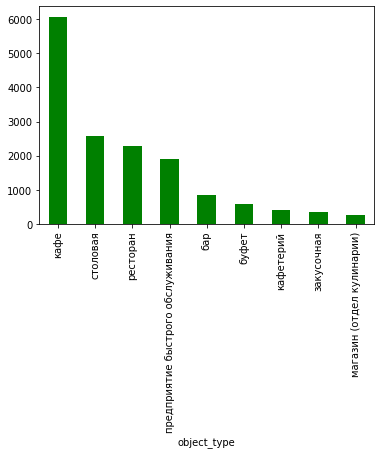

In [13]:
# See the plot
d.plot(kind='bar',color='green')

Findings: We see that most of the establishments are cafes, followed by canteens.

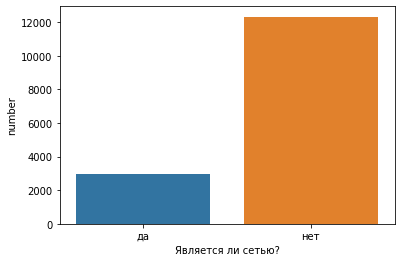

In [14]:
#2.We investigate the ratio of chain and non-chain establishments by the number
f = data.groupby('chain')["number"].count().to_frame().reset_index()
ax = sns.barplot(x='chain',y='number',data=f)
ax.set_xlabel('Является ли сетью?')
plt.show()


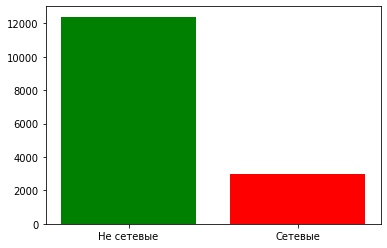

In [15]:
columns = ['Не сетевые', 'Сетевые']
сhain = [12398,2968]
plt.bar(columns,сhain,color=['green','red'])
plt.show()

Findings: there are much more non-chain establishments than chain establishments.

In [ ]:
#3. What type of public catering facility is characterized by network distribution?
d3 = data.copy()
d3 = data[data['chain'] == 'да']
chain_yes= d3.groupby('object_type')["number"].count().to_frame().sort_values(ascending=False,by='number').reset_index()


In [17]:
chain_all= data.groupby('object_type')["number"].count().to_frame().sort_values(ascending=False,by='number').reset_index()
chain_all

,object_type,number
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1898
4,бар,855
5,буфет,577
6,кафетерий,395
7,закусочная,349
8,магазин (отдел кулинарии),273


In [18]:
chain_df = chain_yes.merge(chain_all,on='object_type')
chain_df["share"] = chain_df["number_x"]/chain_df["number_y"]
chain_df

,object_type,number_x,number_y,share
0,кафе,1396,6071,0.229946
1,предприятие быстрого обслуживания,788,1898,0.415174
2,ресторан,543,2282,0.237949
3,магазин (отдел кулинарии),78,273,0.285714
4,закусочная,56,349,0.160458
5,кафетерий,52,395,0.131646
6,бар,37,855,0.043275
7,буфет,11,577,0.019064
8,столовая,3,2584,0.001161


Conclusion: We have 791 PSPs that are network based, and a total of 1923. Accordingly, it is the PSP that is characterized by network propagation.

In [19]:
#4. What is typical for chain establishments: many establishments
#with a small number of seats in each or few establishments with a large number of seats?
data2 = data.copy()
data2 = data2[data2['chain']=='да']

In [20]:
data_plotly = data2.groupby('object_name').agg(число_заведений=('number','count'), число_мест=('number','mean')).reset_index()

# Conclusion: 
we see that there are few networks with a large number of seats in network establishments. As a rule, there are no more than 125 of them.

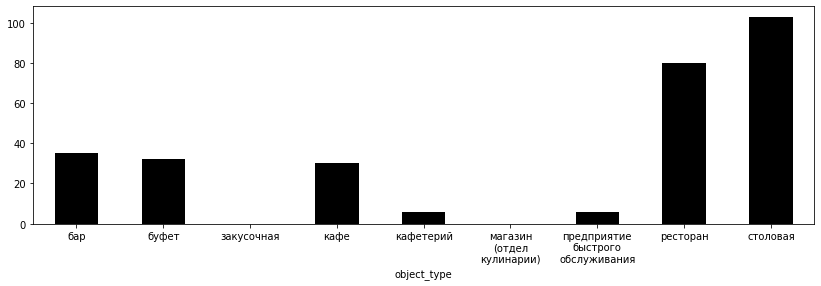

In [24]:
#5.For each kind of catering facility, let's describe the average number of seats.
#Which species provides the highest number of seats on average? Build charts.

plt.figure(figsize=(14,4))

avg_number = data.groupby('object_type')["number"].median().plot(kind='bar',color='black')

# Код ревьюера
old_ticks, old_labels = plt.xticks()

plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)
plt.show()

Conclusion: we see that the canteen provides the most seats - as many as 130 seats. Next comes the restaurant.

In [26]:
#7.Plot a graph of the top 10 streets by the number of catering facilities.
#Use external information and answer the question - in what districts of Moscow are these streets located?


In [27]:
top10_streets = data.groupby('street')["object_name"].count().to_frame().sort_values(ascending=False,by="object_name").head(10).reset_index()
top10_streets

,street,object_name
0,проспект Мира,204
1,Профсоюзная улица,181
2,Ленинградский проспект,170
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,128
7,Кутузовский проспект,114
8,Каширское шоссе,111
9,Кировоградская улица,108


In [28]:
fig = px.bar(top10_streets, x='street', y='object_name', 
              color='street',text='object_name')
fig.show()

In [29]:
district = pd.read_csv('mosgaz-streets.csv')
district
top10_streets_merged = top10_streets.merge(district[['streetname', 'okrug', 'area']], left_on='street', right_on='streetname')
streets = pd.DataFrame(data=top10_streets_merged['street'].unique(), columns=['street'])

def areas(row, data):
    result = data[data['street']==row['street']]['area'].to_list()
    return result
top10_streets['areas'] = top10_streets.apply(areas, args=[top10_streets_merged], axis=1)
print('\n')
for street, areas in zip(top10_streets['street'], top10_streets['areas']):
    print('{} находится в:'.format(street))   
    for area in areas:
        numeric=1
        print('-', area)
    print('')    



проспект Мира находится в:
- Алексеевский район
- Ярославский Район
- Район Марьина роща
- Останкинский район
- Район Ростокино
- Район Свиблово
- Мещанский район

Профсоюзная улица находится в:
- Академический район
- Район Черемушки
- Район Ясенево
- Район Коньково
- Обручевский район
- Район Теплый Стан

Ленинградский проспект находится в:
- Район Аэропорт
- Район Беговой
- Хорошевский район
- Район Сокол

Пресненская набережная находится в:
- Пресненский район

Варшавское шоссе находится в:
- Район Чертаново Центральное
- Район Чертаново Северное
- Район Чертаново Южное
- Донской район
- Район Нагатино-Садовники
- Нагорный район
- Район Северное Бутово
- Район Южное Бутово

Ленинский проспект находится в:
- Район Проспект Вернадского
- Район Тропарево-Никулино
- Донской район
- Район Гагаринский
- Ломоносовский район
- Обручевский район
- Район Теплый Стан
- Район Якиманка

проспект Вернадского находится в:
- Район Проспект Вернадского
- Район Раменки
- Район Тропарево-Никулино
-

In [30]:
areas_top10_streets_pivot = top10_streets_merged.groupby('street', as_index=False).agg({'object_name':'mean', 'area':'nunique'})
areas_top10_streets_pivot.columns = ['', 'Объектов','Районов']
areas_top10_streets_pivot = areas_top10_streets_pivot.set_index('')
areas_top10_streets_pivot.loc[''] = ''
areas_top10_streets_pivot.loc['В среднем'] = areas_top10_streets_pivot[:-1].mean()
areas_top10_streets_pivot

,Объектов,Районов
,,
Варшавское шоссе,164,8
Каширское шоссе,111,4
Кировоградская улица,108,3
Кутузовский проспект,114,2
Ленинградский проспект,170,4
Ленинский проспект,147,8
Пресненская набережная,167,1
Профсоюзная улица,181,6
проспект Вернадского,128,5


Prospect Mira: Meshchansky, Maryina Roshcha, Alekseevsky, Ostankinsky, Sviblovo, Rostokino
Profsoyuznaya street: Akademichesky, Konkovo, Obruchevsky, Tyoply Stan, Cheryomushki, Yasenevo
Leningradsky Prospekt: ​​Begovoy, Airport, Sokol, Khoroshevsky
Presnenskaya embankment: Presnensky
Warsaw highway: Donskoy, Nagatino-Sadovniki, Nagorny
Leninsky Prospekt: ​​Gagarinsky and Donskoy
Prospect Vernadsky: Prospect Vernadsky
Kutuzovsky prospect: Dorogomilovo, Fili-Davydkovo
Kashirskoye Highway: Nagatino-Sadovniki and Nagorny
Khodynsky Boulevard: Khoroshevsky

In [31]:
#8.Find the number of streets with one catering facility.
#Use external information and answer the question - in what districts of Moscow are these streets located?
onerest_street = data.groupby('street')["object_name"].count().to_frame().sort_values(ascending=True,by='object_name').head(551).reset_index()
display(onerest_street)

,street,object_name
0,Перовский проезд,1
1,переулок Маяковского,1
2,переулок Красина,1
3,переулок Васнецова,1
4,Икшинская улица,1
...,...,...
546,улица Кошкина,1
547,улица Маршала Новикова,1
548,улица Капотня,1
549,улица Жуковского,1


In [32]:
onerest_street_merged = onerest_street.merge(district[['streetname', 'area']], left_on='street', right_on='streetname')
streets = pd.DataFrame(data=onerest_street_merged['street'].unique(), columns=['street'])

def areas(row, data):
    result = data[data['street']==row['street']]['area'].to_list()
    return result
onerest_street['areas'] = onerest_street.apply(areas, args=[onerest_street_merged], axis=1)
print('\n')
for street, areas in zip(onerest_street['street'], onerest_street['areas']):
    print('{} находится в:'.format(street))   
    for area in areas:
        numeric=1
        print('-', area)
    print('')    



Перовский проезд находится в:
- Район Лефортово
- Нижегородский район

переулок Маяковского находится в:
- Таганский район

переулок Красина находится в:
- Пресненский район

переулок Васнецова находится в:
- Мещанский район

Икшинская улица находится в:
- Дмитровский район

Институтский переулок находится в:
- Район Марьина роща

Институтский проезд находится в:

Интернациональная улица находится в:
- Район Внуково

Яхромская улица находится в:
- Дмитровский район

Яузский бульвар находится в:
- Таганский район

Ясногорская улица находится в:
- Район Ясенево

Калибровская улица находится в:
- Останкинский район

Калошин переулок находится в:
- Район Арбат

Янтарный проезд находится в:
- Лосиноостровский район

Ялтинская улица находится в:
- Нагорный район

Якиманский переулок находится в:
- Район Якиманка

Канатчиковский проезд находится в:
- Донской район

Карельский бульвар находится в:
- Дмитровский район

Измайловская площадь находится в:
- Район Измайлово

Юрловский проезд нахо

- Район Богородское

улица Рудневой находится в:
- Бабушкинский район

улица Савельева находится в:
- Район Хамовники

улица Школа-интернат находится в:

1-й Николощеповский переулок находится в:
- Район Арбат

1-й Новокузнецкий переулок находится в:
- Район Замоскворечье

1-й Обыденский переулок находится в:
- Район Хамовники

1-й Рижский переулок находится в:
- Алексеевский район

1-й Саратовский проезд находится в:
- Район Текстильщики

1-й Сельскохозяйственный проезд находится в:
- Район Ростокино

1-й Сетуньский проезд находится в:
- Район Раменки

1-й Силикатный проезд находится в:
- Район Хорошево-Мневники

1-й Спасоналивковский переулок находится в:
- Район Якиманка

улица Шеногина находится в:
- Район Хорошево-Мневники

1-й Тушинский проезд находится в:
- Район Покровское-Стрешнево

1-й проезд Марьиной Рощи находится в:
- Район Марьина роща

1-я Аэропортовская улица находится в:
- Район Аэропорт

1-я Боевская улица находится в:
- Район Сокольники

1-я Ватутинская улица находит

In [33]:
areas_top10_streets_pivotr = onerest_street_merged.groupby('street', as_index=False).agg({'object_name':'mean', 'area':'nunique'})
areas_top10_streets_pivotr.columns = ['', 'Объектов','Районов']
areas_top10_streets_pivotr = areas_top10_streets_pivotr.set_index('')
areas_top10_streets_pivotr.loc[''] = ''

areas_top10_streets_pivotr

,Объектов,Районов
,,
1-й Балтийский переулок,1,1
1-й Басманный переулок,1,2
1-й Ботанический проезд,1,1
1-й Вешняковский проезд,1,1
1-й Голутвинский переулок,1,1
...,...,...
улица Шумилова,1,1
улица Шумкина,1,1
улица Щорса,1,1


Findings: only 552 streets with one catering facility. Most of the streets are not in the center, there is relatively little traffic there.
    

In [34]:
#9.Look at the distribution of the number of seats for streets with
#large number of catering facilities. What patterns can be identified?
top_10 = list(top10_streets['street'])
top_10

['проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица']

In [35]:
top10_street = data[data['street'].isin(top_10)]
top10_street

,id,object_name,chain,object_type,address,number,street
151,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
...,...,...,...,...,...,...,...
15226,213629,додо пицца,да,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная
15243,198436,милти,да,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 80, ...",0,Ленинградский проспект
15265,222491,кальянная «мята lounge»,да,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40,Профсоюзная улица
15268,213061,мята,да,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,Каширское шоссе


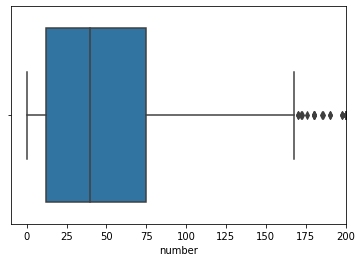

In [36]:
ax = sns.boxplot(x=top10_street['number'])
ax.set_xlim(-10,200)
plt.show()

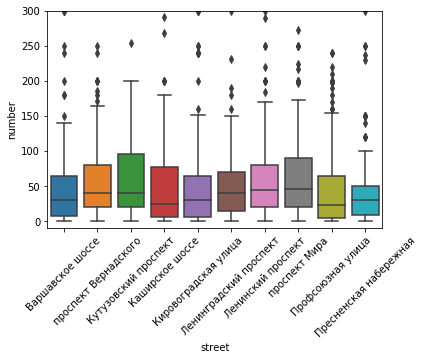

In [37]:
ax = sns.boxplot(x='street',y='number',data=top10_street)
plt.xticks(rotation=45)
ax.set_ylim(-10,300)
plt.show()

In [38]:
df3 = data.copy()
df3 = data[data['street']=='Пресненская набережная']
print(df3['number'].mean())
print(df3['number'].median())

45.84431137724551
30.0


In [39]:
df4 = data.copy()
df4 = data[data['street']=='Ходынский бульвар']
print(df4['number'].mean())
print(df4['number'].median())

18.95098039215686
10.0


In [40]:
df5 = data.copy()
df5 = data[data['street']=='улица Новый Арбат']
print(df5['number'].mean())
print(df5['number'].median())

54.18478260869565
36.0


We see that the trade union has a fairly large confidence interval, which means there are restaurants with a lot of seats.
The same can be said about Mira Avenue.

# Conclusion:
  1. Most people like simple and inexpensive establishments (canteens, cafes, fast foods). They develop and grow very quickly.
  2. There are much more non-chain establishments than chain establishments.
  3. Most online places don't have that many seats. Average up to 50
  4. Most of the seats are provided by the dining room - as many as 130 seats. Next comes the restaurant.
  5. Most public catering facilities are located in the South-Eastern Administrative District of Moscow. Apparently there is a demand.

# Recommendations:
 1. If you open a restaurant, then you need to open it with a high density of people. Best Presnenskaya Embankment, Khodynsky Boulevard, Novy Arbat
 2. The study showed that on the most passable streets, about an average of about 33 seats, so I would advise you to do something like this, but also enable the TAKE AWAY function.
 3. The study showed that most people prefer inexpensive and fast food establishments, so I advise you to open some kind of diner or burger place.

# Presentation
 https://1drv.ms/p/s!Av1D_sdJ6zeIhCPuuqXKaTVyQedq?e=jtqVe9